# The Laplace Transform and Discontinuous Functions

## Intended Learning Outcomes

By the end of this section, you should be able to:

- Define the Heaviside (unit step) function $H_a(t)$ and explain how it models discontinuities.
- Express $H_a(t)$ as a shift of $H_0(t)$ and understand why its precise value at $t=a$ does not affect the Laplace Transform.
- Derive and apply the $t$-shift property of the Laplace transform.

- Rewrite discontinuous functions using step functions to simplify Laplace analysis.

- Use the inverse $t$-shift rule to interpret expressions like $e^{-as}\tilde{f}(s)$ when finding inverse transforms.


**This text is still undergoing improvements:**  Please report any errors or things that are unclear to [https://github.com/joelmiller/Laplace/issues](https://github.com/joelmiller/Laplace/issues)


## Introduction
An important use of the Laplace Transform is that it provides a relatively clean method to handle physical systems that have discontinuous inputs, such as switches that turn on and off or collisions between objects.  Before we can use it for this, we need to build up some mathematical tools.  

The main tool we will use is the Heaviside Step Function.  The Heaviside Step Function is used to ``turn a function on'' at a specified time.

## The Heaviside Step Function


A useful tool to study discontinuities is the *Heaviside Step Function*, sometimes called the *unit step function*.

````{prf:definition}
:label: Def_Heaviside
The *Heaviside Step Function*, also known as the *unit step function* is a function $H_a(t)$ defined by 

$$
H_a(t) = \begin{cases} 0 & t < a\\
                       1 & t \geq a
                       \end{cases}
$$
````

This function has a sudden jump at $t=a$.  It is defined so that at $t=a$, it is continuous from the right hand side.  

When we plot this function using Matlab, it places straight lines between adjacent points.  So the discontinuous jump is drawn as an almost vertical line.  To illustrate several functions $H_a(t)$, we plot $\frac{a H_a(t)}{2}$ for multiple values of $a$ below.


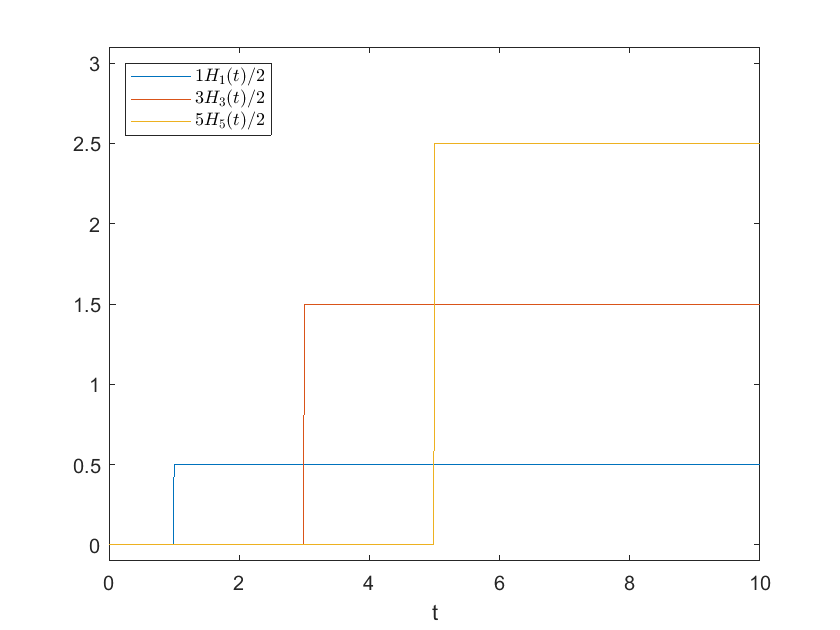

In [9]:
t = linspace(0, 10, 1001);
for a=[1,3,5]
    Ha = t>=a;  %defines Ha(t) = 1 for t>=a, 0 otherwise
    plot(t,(a/2).*Ha, 'DisplayName', sprintf('$%d H_%d(t)/2$',a,a)  )
    hold on
end
legend('location', 'northwest', 'Interpreter', 'latex')
ylim([-0.1,3.1])
xlabel('t')



````{prf:example} Using the Heaviside Step Function to create discontinuous functions.

To see how we use $H_a(t)$ to create discontinuous functions in practice, we  plot $(a +\sin(t)) H_a(t)$.
````

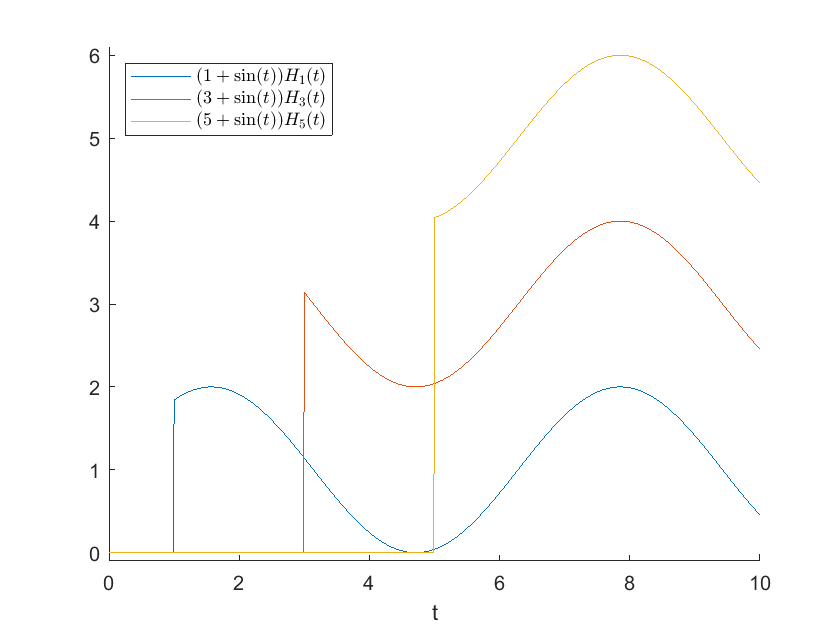

In [12]:
t = linspace(0, 10,1001);
for a=[1,3,5]
    Ha = t>=a;  %defines Ha(t) = 1 for t>=a, 0 otherwise
    hold on
    plot(t,(a+sin(t)).*Ha, 'DisplayName', sprintf('$(%d + \\sin(t))H_%d(t)$', a ,a))
end
legend('location', 'northwest', 'Interpreter', 'latex')
ylim([-0.1,6.1])
xlabel('t')


### Alternate definitions of $H_a(t)$

The choice that $H_a(t)$ is continuous from the right at $t=a$ is arbitrary.  Others could define 

$$
H_a(t) = \begin{cases}
 0 & t \leq a\\
 1 & t > a
 \end{cases}
 $$
in which case $H_a(t)$ is continuous from the left hand side at $t=a$.  A common choice is  

$$H_a(t) = \begin{cases}
0 & t<a \\
0.5 & t=a\\
1 & t>a
\end{cases}
$$
which splits the difference between the two limits.  

For the purposes of solving differential equations, any of these definitions can be used without changing any of our results.  These functions appear as discontinuous changes to the derivatives (at first, second, or higher order), and the value of the derivative at the point $a$ has no impact on the value of the integral. 

The value of a finite function at a single point has no impact on the integral, and so the Laplace Transform:

$$\mathcal{L}[H_a(t)](s) = \int_0^\infty H_a(t) e^{-st} \, dt$$
of all of these definitions will be the same.  The solutions to our differential equations will be the same regardless of how we choose to define $H_a(t)$.  They are all equivalent for our purposes[^equivalence_note].

[^equivalence_note]: Mathematically, we create an *equivalence class* where we consider discontinuous functions to be equivalent and interchangeable as long as they are identical everywhere they are continuous.  This is similar to the concept that $1/2 = 2/4 = 3/6$ --- we can use these interchangeably for most mathematical purposes.  So much so that we teach people that they actually are the same thing. Ask a parent with 3 hungry, irritable children and no knife if they care whether you give them 1 half, 2 quarters or 3 sixths of a pie.  They are different, but for the purposes of mathematical operations they are interchangeable.




### $H_a(t)$ as a shifted version of $H_0(t)$
It will be convenient for our analysis to use $H_a(t)$ in our equations.  However, most computer programming languages that have a built-in Heaviside Function only define $H_0(t)$, a function that is $0$ for $t<0$ and $1$ for $t>1$ (with varying choices about how to handle $t=0$).

So it will be useful to know how $H_a(t)$ and $H_0(t)$ are related.  Since $H_a(t)$ is simply a shift of $H_0(t)$ by a distance $a$, we have 

$$
H_a(t) = H_0(t-a)
$$  

You can verify this from the definitions:
- The function $H_a(t)$ is $1$ if $t>a$ and $0$ if $t<a$. 
- The function $H_0(t-a)$ is $1$ if $t-a>0$ (that is, if $t>a$) and $0$ if $t-a<0$ (that is $t<a$).

Since these functions have the same values for $t>a$ or $t<a$, as long as our choice of how to define them at $t=a$ is consistent, they must be the same function.  Thus $H_a(t) = H_0(t-a)$.





## Implementing the Heaviside Function Computationally
A common way (and the method used by `Matlab`) to implement the Heaviside Function in Matlab without using special toolboxes is described here: [https://au.mathworks.com/help/signal/gs/impulse-step-and-ramp-functions.html](https://au.mathworks.com/help/signal/gs/impulse-step-and-ramp-functions.html).

Typically when the Heaviside function is plotted (by `Matlab`) you will get an almost vertical line connecting the two ends.  This is because the plotting algorithm simply draws a line between "adjacent" points.  To plot it without this vertical line requires more effort.  To keep the code used in this text easier to read, we will not typically do this. 

The code cell below implements $H_3(t)$ and plots it.

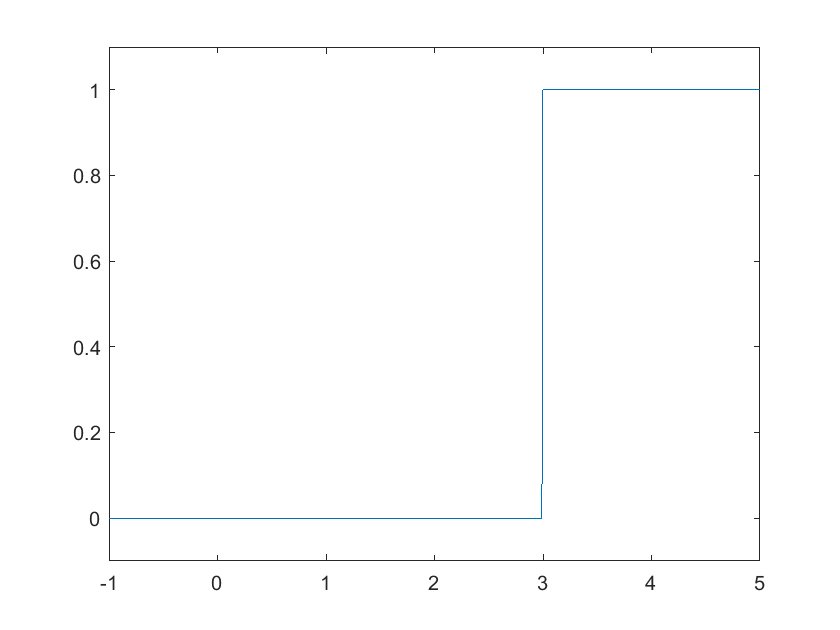

In [ ]:
                            
t = linspace(-1,5,601);
H3 = t>=3;   %This is 0 where t<3 and 1 for t>=3
plot(t, H3)

ylim([-0.1,1.1]) %make axes a bit larger so that it's clearer.

Notice that although the function is discontinuous at $t=3$, Matlab will still draw a line from the last point before $t=3$ to the first point with $t \geq 3$.  If the $t$ values were far apart, then this line will not appear vertical.

(tshift-transform)=
## The transform of $H_a(t) f(t-a)$

We encounter functions like $H_a(t) f(t-a)$ when a switch is abruptly flipped at time $a$.  When we later solve Equation {eq}`eq:basic_driven_ODE`, we will take the Laplace Transform of both sides.  If the right hand side is discontinuous, then we need to be able to calculate its transform.  We have from the definition of the Laplace Transform:
\begin{align*}
\mathcal{L}[H_a(t)f(t-a)](s) &= \int_0^\infty H_a(t) f(t-a) e^{-st} \, dt\\
&= \int_0^a 0 \, dt + \int_a^\infty f(t-a)e^{-st} \, dt
\end{align*}
using the fact that $H_a(t)=0$ for $t<a$ and $1$ for $t>a$.  Now we do a $u$-substitution, with $u = t-a$.  So $du/dt = 1$ and $du=dt$.  When $t=a$, $u=0$ and as $t \to \infty$, we also have $u \to \infty$.  So
\begin{align*}
\mathcal{L}[H_a(t)f(t-a)](s) &= \int_0^\infty f(u) e^{-s(u+a)} \, du\\
&= e^{-sa} \int_0^\infty f(u) e^{-su} \, du\\
&= e^{-sa} \mathcal{L}[f(t)](s)
\end{align*}
In the last step, we used the fact that the integral in that step is the definition of the Laplace Transform of $f$.  So we have

````{prf:theorem} The $t$-shift
:label: thm:t-shift
If the Laplace Transform of $f(t)$ exists, then the Laplace Transform of $H_a(t) f(t-a)$ is

$$
\mathcal{L}[H_a(t) f(t-a)](s) = e^{-sa} \tilde{f}(s)
$$(eq:Lap_tshift)
````


(untshift-transform)=
### The transform of $H_a(t) f(t)$
In many applications we encounter effects that suddenly turn on at some time $t=a$.  We account for these mathematically by multiplying a function by $H_a(t)$.

Sometimes it is more natural to think of the effect in terms of time since it was turned on.  In this case, we typically encounter $H_a(t) f(t-a)$, and we have just seen the Laplace Transform for this.  

Sometimes it is more natural to think of the effect in terms of time since the entire system started.  In this case we typically encounter $H_a(t) f(t)$. 

To determine the transform of $H_a(t) f(t)$, we modify it so that {prf:ref}`thm:t-shift` applies.  We must find a function $g(t)$ such that $f$ is a shift of $g$: $f(t) = g(t-a)$. Then we apply the rule derived above to $H_a(t)g(t-a)$.  It turns out that the function $g$ for which $f(t) = g(t-a)$ is $g(t) = f(t+a)$.

From this,

$$
\mathcal{L}[H_a(t) f(t)](s) = e^{-sa} \mathcal{L}[f(t+a)](s)
$$(eq:Lap_Ha_ft)


## Preparing a piecewise continuous function so that we can apply the Laplace Transform
In {numref}`Lap:Table` {ref}`Lap:Table`, we have

$$
\mathcal{L}[H_a(t) f(t-a)](s) = e^{-as} \tilde{f}(s)
$$

We will see how to write a piecewise continuous function as the sum of functions of the form $H_a(t) f(t-a)$.  This will allow us to take their Transform.

We can use the Heaviside Step Function to compactly write functions with discontinuous jumps.

Consider the function defined for $t \geq 0$ by

$$
f(t) = \begin{cases}
 t &  0 \leq t < 3\\
 t - t^2 & 3 \leq t 
 \end{cases}
$$

Without using the Heaviside function, this is not very compact, and working with it computationally is a little awkward.   We plot $f(t)$ below:

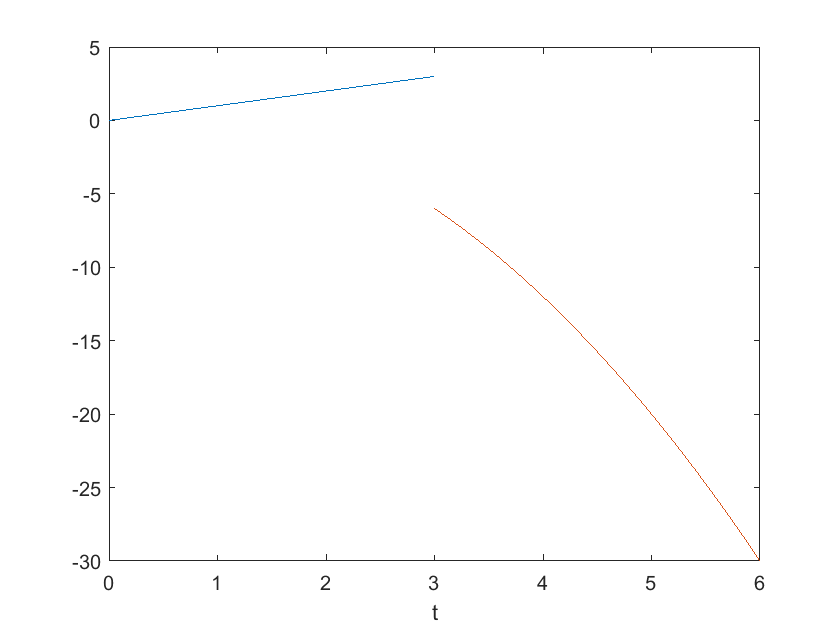

In [ ]:
t1 = linspace(0,3, 61);
t2 = linspace(3,6, 61);

plot(t1, t1)        % notice that if we don't specify color, 
hold on             % the two plots will be given 
plot(t2, t2- t2.^2) % different colors
xlabel('t')

### The Laplace Transform of a Piecewise Continuous Function
Now we introduce a procedure that will convert $f(t)$ into the sum of functions that can be transformed using the Laplace Transform Table.  We'll introduce it through an example with a single discontinuity and then give the method.

````{prf:example} Finding the Laplace Transform of $f(t) = \begin{cases} t &  0 \leq t < 3\\ t - t^2 & 3 \leq t \end{cases}$ 
:label:example:piecewise_decomposition

We see that a jump occurs at $t=3$. We will write $f(t)$ as a continuous function $f_0(t)$ plus $H_3(t)$ times another continuous function $f_1(t)$:

$$
f(t) = f_0(t) + H_3(t) f_1(t)
$$

From looking at $t<3$ (where $H_3(t) f_1(t)=0$), the left hand side is $t$, so we have $t = f_0(t)$.  Thus we conclude that $f_0(t) = t$.

From looking at $t>3$, the left hand side is $t-t^2$ and the right hand side is $f_0(t) + f_1(t)$.  Setting these equal and using $f_0(t)=t$ we have

$$
t-t^2 = t + f_1(t)
$$

so $f_1(t) = -t^2$

We arrive at the compact form

$$
f(t) = t + H_3(t) (-t^2)
$$
which is demonstrated visually in {numref}`fig_piecewise_decomp`.

```{figure} ../images/piecewise_decomposition.png
---
height: 500px
name: fig_piecewise_decomp
---
The relation between $f(t)$, $f_0(t)$, and $f_1(t)$ for $f(t) = f_0(t) + H_a(t) f_1(t)$.
```

If we attempt to take the Laplace Transform of $t+H_3(t) (-t^2)$  using {numref}`Lap:Table` {ref}`Lap:Table` the second term gives us trouble.  The table tells us that $\mathcal{L}[H_3(t) g(t-3)](s) = e^{-3s} \tilde{g}(s)$, but we don't have a function of $t-3$, we have a function directly of $t$.  So we follow {numref}`untshift-transform`:

$$
f(t) = t + H_3(t) g(t-3)
$$

where $g(t) = f(t+3) = -(t+3)^2 = -(t^2+6t+9)$.  For the Laplace Transform, we have

$$
\mathcal{L}[f(t)](s) = \mathcal{L}[t](s) + \mathcal{L}[H_3(t)g(t-3)](s)\\
$$

From {numref}`Lap:Table` {ref}`Lap:Table`, the transform of $t^n$ is $n!/s^{n+1}$, so
\begin{align*}
\mathcal{L}[f(t)](s) &= \frac{1}{s^2} + \mathcal{L}[H_3(t)g(t-3)](s)\\
 &= \frac{1}{s^2} + e^{-3s}\mathcal{L}[g(t)](s)\\
&= \frac{1}{s^2} + e^{-3s} \mathcal{L}[-(t^2+6t+9)](s)\\
&= \frac{1}{s^2} - e^{-3s} \left( \frac{2!}{s^3} + \frac{6}{s^2} + \frac{9}{s}\right)
\end{align*}
and so

$$
\tilde{f}(s) = \frac{1}{s^2} - e^{-3s} \left( \frac{2!}{s^3} + \frac{6}{s^2} + \frac{9}{s}\right)
$$


The computational cell below and the resulting plot attempts to show how $f_0(t)$, $f_1(t)$, and $H_3(t)$ are related to $f(t)$.
````


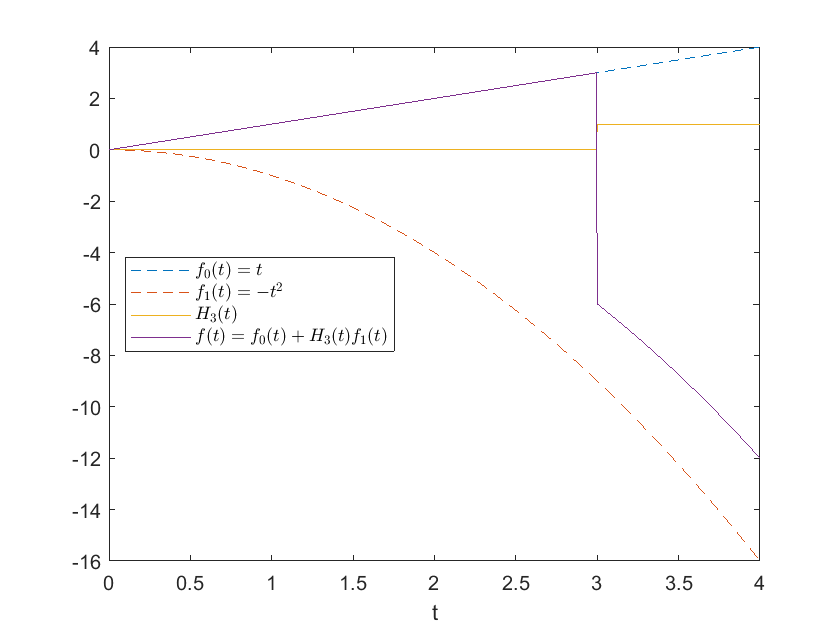

In [16]:
t = linspace(0, 4, 801);

H3 = t>=3;  %define H_3(t) to be 1 if t>=3 and 0 otherwise

plot(t, t, '--', 'DisplayName', "$f_0(t)=t$")
hold on 
plot(t, -t.^2, '--', 'DisplayName', "$f_1(t)=-t^2$")
plot(t, H3, 'DisplayName', '$H_3(t)$')
plot(t, t- t.^2 .*H3, 'DisplayName', "$f(t) = f_0(t) + H_3(t) f_1(t)$")  % this plots with 1 color, 
                         % but it includes the jump as a vertical line
xlabel('t')
legend("location", "west", 'Interpreter', 'latex')

### Procedure for the Laplace Transform of a function with a single point of discontinuity

If we have a function $f(t)$ that has a jump discontinuity at the point $t=a>0$, then we will be able to rewrite $f(t) = f_0(t) + H_a(t) f_1(t)$  through the following steps:

- Set $f_0(t)$ to be a function that matches $f(t)$ for $t<a$.  For $t<a$, we have $f(t)=f_0(t)$.  However $f(t)$ does not match the continuation of $f_0(t)$ for $t>a$. 
- For $t>a$, we find $f_1(t) = f(t) - f_0(t)$.  That is, we subtract the continuation of what $f$ looks like for $t<a$ from the function $f(t)$ for $t>a$.

Then $f(t) = f_0(t) + H_a(t) f_1(t)$.  The function $f_1(t)$ can be thought of as being 'off' for $t<a$,  so $f(t) = f_0(t)$ for $t<a$.  However as $t$ crosses $a$ $f_1(t)$ turns on and remains on.  The combined sum $f_0(t) + f_1(t)$ will equal $f(t)$ for $t>a$.

Often to compute the Laplace Transform of $H_a(t) f_1(t)$ we want $f_1(t)$ in the form $g_1(t-a)$.  To find what $g_1(t)$ is, we simply set $g_1(t) = f_1(t+a)$.  The transform table as presented in this text includes both $\mathcal{L}[H_a(t)f(t)](s)$ and $\mathcal{L}[H_a(t)f(t-a)](s)$, and you can check that these are equivalent if we use $g_1(t) = f_1(t+a)$.

You can check that these steps are consistent with the example above.






### General procedure for the Laplace Transform of a Piecewise Continuous Function

If we want to take the Laplace Transform of a piecewise continuous function $f(t)$ with a discontinuity at $t=a$, we can follow a procedure.  The basic idea is that at a jump at $t=a$ we need to find the function that gives the difference between $f$ on the right and $f$ on the left of the jump.  Then the function can be written as whatever it is known to be on the left plus the difference times $H_a(t)$.  The example above did this with a single discontinuity, but this can be repeated.

The general procedure is:

- Find the location(s) of discontinuity, $a_1 < a_2< \cdots < a_n$
- For $t<a_1$, we set $f_0(t)$ to be a function that matches $f(t)$ in this region.  Then for $t<a_1$, $f(t) = f_0(t)$
- Next, we set $f_1(t) = f(t)-f_0(t)$ in $a_1 < t< a_2$.  Then for $t<a_2$, $f(t) = f_0(t) + H_{a_1}(t) f_1(t)$  Note that $f_0(t)+f_1(t) = f(t)$ in $a_1<t<a_2$
- At each successive point of discontinuity, we set $f_m(t) = f(t) - f_{m-1}(t)$ for $a_{m}<t<a_{m+1}$.
- Then $f(t) = f_0(t) + H_{a_1}(t) f_1(t) + H_{a_2}(t) f_2(t) + \cdots$.
- Finally to convert $f_m(t)$ to $g_m(t-a_m)$, we set $g_m(t) = f_m(t+a_m)$.

## Inverting functions involving the $t$-shift

When inverting a function $\tilde{f}(s)$, you will know you need to use the $t$-shift if $e^{-as}$ appears for some constant $a$.  If the original function $f(t)$ is discontinuous, then we some terms may have different exponentials (or no exponential).  We will have to do each one of these separately.

The inverse transform of $e^{-as}\tilde{f}(s)$ is
\begin{align*}
\mathcal{L}^{-1}[e^{-as}\tilde{f}(s)](t) &= H_a(t)\mathcal{L}^{-1} [\tilde{f}(s)](t-a)\\
& = H_a(t) f(t-a)
\end{align*}
When we do the inversion, it is helpful to use the notation $\mathcal{L}^{-1}$ until the final step.  It is very easy to accidentally end up with $H_a(t)f(t)$.


````{prf:example} Calculating $\mathcal{L}^{-1}\left[ \frac{1}{s-2} - 2e^{-s} \frac{1}{s-2} + 3 e^{-2s} \frac{1}{s-3}\right ](t)$
:label: example:invert_with_t_shift

To calculate $\mathcal{L}^{-1}[\tilde{f}(s)](t)$ where 

$$
f(s) = \frac{1}{s-2} - 2e^{-s} \frac{1}{s-2} + 3 e^{-2s} \frac{1}{s-3}
$$

we note that each term has a different exponential factor.  We will have to approach each one separately.  We can separate them out because of linearity.  We have
\begin{align*}
\mathcal{L}^{-1}[\tilde{f}(s)](t) &= \mathcal{L}^{-1} \left[\frac{1}{s-2} - 2e^{-s} \frac{1}{s-2} + 3 e^{-2s} \frac{1}{s-3} \right](t)\\
&= \mathcal{L}^{-1} \left[\frac{1}{s-2}\right](t) - 2\mathcal{L}^{-1}\left[e^{-s} \frac{1}{s-2}\right](t) + 3 \mathcal{L}^{-1}\left[e^{-2s} \frac{1}{s-3} \right](t)\\
&= e^{2t} - 2 H_1(t) \mathcal{L}^{-1}\left[ \frac{1}{s-2}\right](t-1) + 3 H_2(t)\mathcal{L}^{-1}\left[\frac{1}{s-3} \right](t-2)\\
&= e^{2t} - 2H_1(t) e^{2(t-1)} + 3 H_2(t) e^{3(t-2)}
\end{align*}
````
Notice that each time we remove an exponential $e^{-sa}$ from inside $\mathcal{L}^{-1}[\cdot](t)$, we get a factor of $H_a(t)$ and the argument of the Inverse Transform becomes $t-a$.

## Self-test

Under construction

1.  Sketch and convert the function 

    $$ 
    f(t) =  \begin{cases} 
                t & t <1\\
                t+t^2 & t \geq 1
            \end{cases}
    $$
    into an expression of the form $f_0(t) + H_a(t)f_1(t)$.
2. Sketch and convert the function

    $$ 
    f(t) =  \begin{cases} 
                t & t <1\\
                t^2 & t \geq 1
            \end{cases}
    $$
    into an expression of the form $f_0(t) + H_a(t)f_1(t)$.
3. Sketch $f(t) = H_2(t)(t-2)$ and find $\mathcal{L}[f(t)](s)$.

4. Find the Laplace Transform of 

    $$ 
    f(t) =  \begin{cases} 
                t & t <1\\
                t+t^2 & t \geq 1
            \end{cases}
    $$
    (an earlier question asked you to write it as $f_0(t) + H_a(t)f_1(t)$).

5. Sketch and find the Laplace Transform of

    $$
    f(t) =  \begin{cases} 
                0 & t<1 \text{ or }  2 \leq t \\
                1 & 1 \leq t < 2
            \end{cases}
    $$
6. (*) In {numref}`tshift-transform`, we derived the transform of $H_a(t) f(t-a)$, which uses a shifted function $f$.  What would happen if instead you tried to calculate the transform of $H_a(t) f(t)$ for an unshifted function $f(t)$ using the same basic derivation?  You should arrive at the result in {numref}`untshift-transform`.